0.01856582064522614
[-0.26450762 -0.27453982 -0.30532669 -0.26833413]
[0.00196398 0.0110752 ]


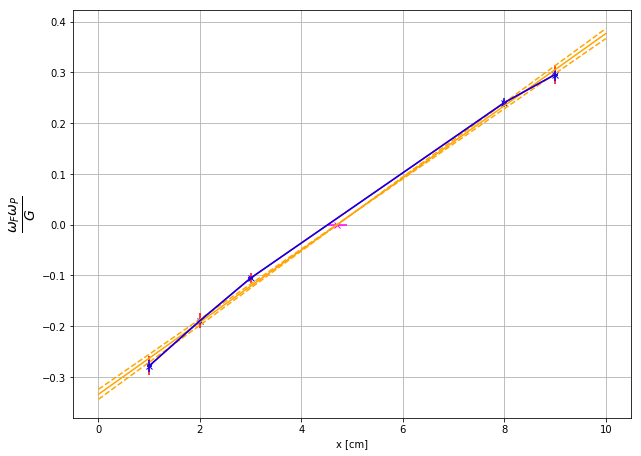

In [18]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Unsicherheiten von Zeit t und Laenge l
ut=0.3
ul=0.05

#Masse Kreisel
m=ufloat(4.52,0.020)

g=9.81

#Eingabe von Periodendauern
p1=-unp.uarray([6.6,4.7,3.6,7.9],ut)
r1=unp.uarray([5.1,6.9,8.1,4.2],ut)/10

p2=-unp.uarray([6.5,6.7,7.0,9.4],ut)
r2=unp.uarray([6.7,6.7,13.7-6.7,5.5],ut)/10 # bei 13.7 vergessen die Stoppuhr wieder auf null zu stellen, also muss 6.7 von der vorherigen Messung abgezogen werden

p3=-unp.uarray([13.7,14.4,9.8,13.4],ut)
r3=unp.uarray([6.8,6.2,7.8,6.1],ut)/10

p4=unp.uarray([5.7,6.6,5.6,6.4],ut)
r4=unp.uarray([6.4,5.5,6.6,6.0],ut)/10

p5=unp.uarray([5.1,4.7,4.1,6.3],ut)
r5=unp.uarray([5.7,6.5,8.0,4.5],ut)/10

p6=unp.uarray([1.7,2.7,3.9,3.2],ut)
r6=unp.uarray([6.7,5.0,3.6,4.0],ut)/10

#Laengen
l1=ufloat(1,ul)
l2=ufloat(2,ul)
l3=ufloat(3,ul)
l4=ufloat(8,ul)
l5=ufloat(9,ul)
l6=ufloat(10,ul)

#Definition von Rechnungen
def mean(arr):
    return sum(arr)/len(arr)

def omega(T):
    return 2*np.pi/T

def IA(r,m,g,Tf,Tp):
    return (omega(Tf)*omega(Tp))/(m*g)

#Als Array formattieren
x=np.array([l1.n,l2.n,l3.n,l4.n,l5.n,l6.n])
stdx=[l1.s,l2.s,l3.s,l4.s,l5.s,l6.s]
y=[mean(IA(l1,m,g,r1,p1)),mean(IA(l2,m,g,r2,p2)),mean(IA(l3,m,g,r3,p3)),(mean(IA(l4,m,g,r4,p4))),mean(IA(l5,m,g,r5,p5)),mean(IA(l6,m,g,r6,p6))]
nomy=np.array(unp.nominal_values(y))
streuung=[np.std(unp.nominal_values(IA(l1,m,g,r1,p1)),ddof=1),np.std(unp.nominal_values(IA(l2,m,g,r2,p2)),ddof=1),np.std(unp.nominal_values(IA(l3,m,g,r3,p3)),ddof=1),np.std(unp.nominal_values(IA(l4,m,g,r4,p4)),ddof=1),np.std(unp.nominal_values(IA(l5,m,g,r5,p5)),ddof=1),np.std(unp.nominal_values(IA(l6,m,g,r6,p6)),ddof=1)]

#Ausgabe
print(np.std(unp.nominal_values(IA(l1,m,g,r1,p1)),ddof=1))
print(unp.nominal_values(IA(l1,m,g,r1,p1)))
plt.plot(x[:-1],nomy[:-1],'x',color='blue')
plt.errorbar(x[:-1],nomy[:-1],xerr=stdx[:-1],yerr=streuung[:-1],color='red')
plt.errorbar(x[:-1],nomy[:-1],xerr=stdx[:-1],yerr=unp.std_devs(y)[:-1],color='blue')
plt.errorbar(offset,0,xerr=Doffset,yerr=0,color='magenta')
plt.plot(offset,0,'x',color='magenta')

#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(0,10,11)
popt,pcov=curve_fit(fitfunc,x[:-1],nomy[:-1])
a,b=popt
c,d=pcov
fit=a*xfit+b
offset=(-b/a)
r=x-offset

#Ausgabe
plt.plot(xfit,fit,'-',color='orange')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit-5)+fit[5]
dfit2=(a-c)*(xfit-5)+fit[5]
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel('x [cm]')
plt.ylabel(r'$\frac{\omega_F\omega_P}{G}$',size='20')
plt.rcParams["figure.figsize"]=fig_size
plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/7_22/discluding_10.png',dpi=300)
plt.show()

### Formel F.44, F.45, F.47, F.48 aus Fehlerberechnungsvorlesung

In [10]:
def a(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

def b(x,y):
    n=len(x)
    return (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)

def s(x,y):
    n=len(x)
    return np.sqrt((1/(n-2))*sum((y-a(x,y)-b(x,y)*x)**2))

def Da(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(sum(x**2)/(n*sum(x**2)-(sum(x))**2))

def Db(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(n/(n*sum(x**2)-(sum(x))**2))

print(a(x[:-1],nomy[:-1]))

print(b(x[:-1],nomy[:-1]))

print(-a(x[:-1],nomy[:-1])/b(x[:-1],nomy[:-1]))

print(popt)

-0.3341558244953867
0.07106857360828966
4.701878868952138
[ 0.08942825 -0.38243497]


In [11]:
offset=-a(x[:-1],nomy[:-1])/b(x[:-1],nomy[:-1])

Doffset=offset*np.sqrt((Da(x[:-1],nomy[:-1])/a(x[:-1],nomy[:-1]))**2+(Db(x[:-1],nomy[:-1])/b(x[:-1],nomy[:-1]))**2)

print(offset)
print(Doffset)
print(Doffset/offset)


4.701878868952138
0.2029017119409751
0.04315332606307526


In [27]:
0.3/6.6

0.045454545454545456

[-0.27817706503022444+/-0.011475297868554125, -0.1891718957656679+/-0.006028549600304417, -0.10517278189309005+/-0.002745980975188721, 0.24051987625940613+/-0.008500820406577833, 0.2957999369433048+/-0.011986669151266898, 0.6927243287382978+/-0.04967719959976627]
0.01856582064522614
[-0.26450762 -0.27453982 -0.30532669 -0.26833413]
[0.01365566 0.0897195 ]


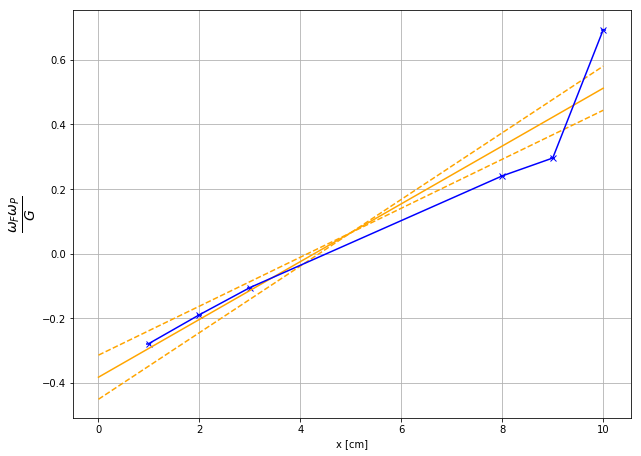

In [17]:
#x=[l1.n,l2.n,l4.n,l5.n,l6.n]
x=np.array([l1.n,l2.n,l3.n,l4.n,l5.n,l6.n])
#stdx=[l1.s,l2.s,l4.s,l5.s,l6.s]
stdx=[l1.s,l2.s,l3.s,l4.s,l5.s,l6.s]
#y=[mean(IA(l1,m,g,r1,p1)),mean(IA(l2,m,g,r2,p2)),(mean(IA(l4,m,g,r4,p4))),mean(IA(l5,m,g,r5,p5)),mean(IA(l6,m,g,r6,p6))]
y=[mean(IA(l1,m,g,r1,p1)),mean(IA(l2,m,g,r2,p2)),mean(IA(l3,m,g,r3,p3)),(mean(IA(l4,m,g,r4,p4))),mean(IA(l5,m,g,r5,p5)),mean(IA(l6,m,g,r6,p6))]
nomy=np.array(unp.nominal_values(y))
#print(stdx)
print(y)
#print(nomy)

streuung=[np.std(unp.nominal_values(IA(l1,m,g,r1,p1)),ddof=1),np.std(unp.nominal_values(IA(l2,m,g,r2,p2)),ddof=1),np.std(unp.nominal_values(IA(l3,m,g,r3,p3)),ddof=1),np.std(unp.nominal_values(IA(l4,m,g,r4,p4)),ddof=1),np.std(unp.nominal_values(IA(l5,m,g,r5,p5)),ddof=1),np.std(unp.nominal_values(IA(l6,m,g,r6,p6)),ddof=1)]

print(np.std(unp.nominal_values(IA(l1,m,g,r1,p1)),ddof=1))
print(unp.nominal_values(IA(l1,m,g,r1,p1)))
plt.plot(x,nomy,'x',color='blue')
#plt.plot(x[:-1],nomy[:-1])
plt.errorbar(x,nomy,xerr=stdx,yerr=unp.std_devs(y)*0.07,color='blue')
#plt.errorbar(x,nomy,xerr=stdx,yerr=streuung,color='blue')

def fitfunc(x,a,b):
    return a*x+b

xfit=np.linspace(0,10,11)
#a,b=np.polyfit(x,nomy,1)
popt,pcov=curve_fit(fitfunc,x,nomy)
a,b=popt
c,d=pcov
fit=a*xfit+b
plt.plot(xfit,fit,'-',color='orange')
#dfit1=(a+c)*xfit+b
#dfit2=(a-c)*xfit+b
#plt.plot(xfit,dfit1)
#plt.plot(xfit,dfit2)
#print(c)
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit-5)+fit[5]
dfit2=(a-c)*(xfit-5)+fit[5]
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel('x [cm]')
plt.ylabel(r'$\frac{\omega_F\omega_P}{G}$',size='20')
plt.rcParams["figure.figsize"]=fig_size
plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/7_22/including_10.png',dpi=300)
plt.show()

In [13]:
def I(x,x0,m,omf,omp):
    return (x-x0)*9.81*m/(omf*omp)

Iall=I(l1,ufloat(offset,Doffset),m,omega(p1),omega(r1)),I(l2,ufloat(offset,Doffset),m,omega(p2),omega(r2)),I(l3,ufloat(offset,Doffset),m,omega(p3),omega(r3)),I(l4,ufloat(offset,Doffset),m,omega(p4),omega(r4)),I(l5,ufloat(offset,Doffset),m,omega(p5),omega(r5))#,I(l6,ufloat(offset,Doffset),m,omega(p6),omega(r6))])
I5=I(l5,ufloat(offset,Doffset),m,omega(p5),omega(r5))
print(mean(np.concatenate(Iall)))
print(np.concatenate(Iall))

14.5+/-0.6
[13.995358285442872+/-1.3078375194974217
 13.48394144970031+/-1.291279897739628
 12.124321081506658+/-1.3014532416639426
 13.795780983689676+/-1.3622461003670734
 13.216052025981924+/-1.3306013949464306
 13.622699780627519+/-1.3630412880234148
 14.869955207189765+/-1.4626318600213626
 15.689320085953284+/-1.5685626704676996
 17.807618022222247+/-2.357242437679159
 17.065952522799506+/-2.281481644540243
 14.611574942235604+/-1.9336502341826074
 15.624674722374909+/-2.0972353205019334
 13.513540176845577+/-1.2821149793215885
 13.446861524657194+/-1.281020182247749
 13.691349916014596+/-1.2967220021357593
 14.22477913352166+/-1.3291937810051568
 14.03367413783121+/-1.30246585212472
 14.74815083972286+/-1.3667193410646319
 15.834348528409482+/-1.5141163659663053
 13.68609087745149+/-1.305242054435163]


In [14]:
def I(x,x0,m,omf,omp):
    return (x*0.01-x0*0.01)*9.81*m/(omf*omp)

Iall=I(l1,ufloat(offset,Doffset),m,omega(p1),omega(r1)),I(l2,ufloat(offset,Doffset),m,omega(p2),omega(r2)),I(l3,ufloat(offset,Doffset),m,omega(p3),omega(r3)),I(l4,ufloat(offset,Doffset),m,omega(p4),omega(r4)),I(l5,ufloat(offset,Doffset),m,omega(p5),omega(r5))#,I(l6,ufloat(offset,Doffset),m,omega(p6),omega(r6))])
I5=I(l5,ufloat(offset,Doffset),m,omega(p5),omega(r5))
print(mean(np.concatenate(Iall)))
print(np.concatenate(Iall))

0.145+/-0.006
[0.1399535828544287+/-0.013078375194974217
 0.13483941449700307+/-0.012912798977396282
 0.12124321081506656+/-0.013014532416639423
 0.13795780983689673+/-0.013622461003670731
 0.13216052025981925+/-0.013306013949464304
 0.13622699780627523+/-0.01363041288023415
 0.14869955207189767+/-0.014626318600213628
 0.15689320085953287+/-0.015685626704677
 0.1780761802222225+/-0.023572424376791596
 0.17065952522799513+/-0.022814816445402432
 0.14611574942235608+/-0.019336502341826076
 0.15624674722374912+/-0.020972353205019337
 0.13513540176845576+/-0.012821149793215886
 0.13446861524657194+/-0.012810201822477489
 0.13691349916014595+/-0.01296722002135759
 0.1422477913352166+/-0.013291937810051568
 0.14033674137831212+/-0.0130246585212472
 0.1474815083972286+/-0.01366719341064632
 0.1583434852840948+/-0.01514116365966305
 0.1368609087745149+/-0.013052420544351632]


In [15]:
0.6/14.5

0.041379310344827586

In [26]:
mean(np.concatenate(Iall))*(1/(4*(np.pi**2)/110**2))

44.30194201816834+/-1.7766056020584053

0.01534365342580671
[-0.21860134 -0.22689241 -0.25233611 -0.22176374]
[0.00162313 0.00915306]


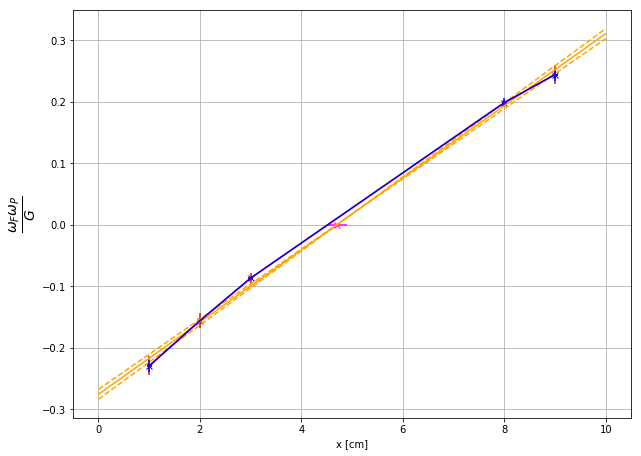

In [27]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Unsicherheiten von Zeit t und Laenge l
ut=0.3
ul=0.05

#Masse Kreisel
m=ufloat(4.52,0.020)

g=9.81

#Eingabe von Periodendauern
p1=-unp.uarray([6.6,4.7,3.6,7.9],ut)*1.10
r1=unp.uarray([5.1,6.9,8.1,4.2],ut)/10*1.10

p2=-unp.uarray([6.5,6.7,7.0,9.4],ut)*1.10
r2=unp.uarray([6.7,6.7,13.7-6.7,5.5],ut)/10*1.10 # bei 13.7 vergessen die Stoppuhr wieder auf null zu stellen, also muss 6.7 von der vorherigen Messung abgezogen werden

p3=-unp.uarray([13.7,14.4,9.8,13.4],ut)*1.10
r3=unp.uarray([6.8,6.2,7.8,6.1],ut)/10*1.10

p4=unp.uarray([5.7,6.6,5.6,6.4],ut)*1.10
r4=unp.uarray([6.4,5.5,6.6,6.0],ut)/10*1.10

p5=unp.uarray([5.1,4.7,4.1,6.3],ut)*1.10
r5=unp.uarray([5.7,6.5,8.0,4.5],ut)/10*1.10

p6=unp.uarray([1.7,2.7,3.9,3.2],ut)*1.10
r6=unp.uarray([6.7,5.0,3.6,4.0],ut)/10*1.10

#Laengen
l1=ufloat(1,ul)
l2=ufloat(2,ul)
l3=ufloat(3,ul)
l4=ufloat(8,ul)
l5=ufloat(9,ul)
l6=ufloat(10,ul)

#Definition von Rechnungen
def mean(arr):
    return sum(arr)/len(arr)

def omega(T):
    return 2*np.pi/T

def IA(r,m,g,Tf,Tp):
    return (omega(Tf)*omega(Tp))/(m*g)

#Als Array formattieren
x=np.array([l1.n,l2.n,l3.n,l4.n,l5.n,l6.n])
stdx=[l1.s,l2.s,l3.s,l4.s,l5.s,l6.s]
y=[mean(IA(l1,m,g,r1,p1)),mean(IA(l2,m,g,r2,p2)),mean(IA(l3,m,g,r3,p3)),(mean(IA(l4,m,g,r4,p4))),mean(IA(l5,m,g,r5,p5)),mean(IA(l6,m,g,r6,p6))]
nomy=np.array(unp.nominal_values(y))
streuung=[np.std(unp.nominal_values(IA(l1,m,g,r1,p1)),ddof=1),np.std(unp.nominal_values(IA(l2,m,g,r2,p2)),ddof=1),np.std(unp.nominal_values(IA(l3,m,g,r3,p3)),ddof=1),np.std(unp.nominal_values(IA(l4,m,g,r4,p4)),ddof=1),np.std(unp.nominal_values(IA(l5,m,g,r5,p5)),ddof=1),np.std(unp.nominal_values(IA(l6,m,g,r6,p6)),ddof=1)]

#Ausgabe
print(np.std(unp.nominal_values(IA(l1,m,g,r1,p1)),ddof=1))
print(unp.nominal_values(IA(l1,m,g,r1,p1)))
plt.plot(x[:-1],nomy[:-1],'x',color='blue')
plt.errorbar(x[:-1],nomy[:-1],xerr=stdx[:-1],yerr=streuung[:-1],color='red')
plt.errorbar(x[:-1],nomy[:-1],xerr=stdx[:-1],yerr=unp.std_devs(y)[:-1],color='blue')
plt.errorbar(offset,0,xerr=Doffset,yerr=0,color='magenta')
plt.plot(offset,0,'x',color='magenta')

#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(0,10,11)
popt,pcov=curve_fit(fitfunc,x[:-1],nomy[:-1])
a,b=popt
c,d=pcov
fit=a*xfit+b
offset=(-b/a)
r=x-offset

#Ausgabe
plt.plot(xfit,fit,'-',color='orange')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit-5)+fit[5]
dfit2=(a-c)*(xfit-5)+fit[5]
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel('x [cm]')
plt.ylabel(r'$\frac{\omega_F\omega_P}{G}$',size='20')
plt.rcParams["figure.figsize"]=fig_size
plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/7_22/discluding_10.png',dpi=300)
plt.show()

In [28]:
def a(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

def b(x,y):
    n=len(x)
    return (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)

def s(x,y):
    n=len(x)
    return np.sqrt((1/(n-2))*sum((y-a(x,y)-b(x,y)*x)**2))

def Da(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(sum(x**2)/(n*sum(x**2)-(sum(x))**2))

def Db(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(n/(n*sum(x**2)-(sum(x))**2))

print(a(x[:-1],nomy[:-1]))

print(b(x[:-1],nomy[:-1]))

print(-a(x[:-1],nomy[:-1])/b(x[:-1],nomy[:-1]))

print(popt)

def I(x,x0,m,omf,omp):
    return (x-x0)*9.81*m/(omf*omp)

Iall=I(l1,ufloat(offset,Doffset),m,omega(p1),omega(r1)),I(l2,ufloat(offset,Doffset),m,omega(p2),omega(r2)),I(l3,ufloat(offset,Doffset),m,omega(p3),omega(r3)),I(l4,ufloat(offset,Doffset),m,omega(p4),omega(r4)),I(l5,ufloat(offset,Doffset),m,omega(p5),omega(r5))#,I(l6,ufloat(offset,Doffset),m,omega(p6),omega(r6))])
I5=I(l5,ufloat(offset,Doffset),m,omega(p5),omega(r5))
print(mean(np.concatenate(Iall)))
print(np.concatenate(Iall))

-0.27616183842593944
0.0587343583539584
4.701878868952138
[ 0.05873436 -0.27616184]
17.5+/-0.7
[16.934383524506117+/-1.582483398539669
 16.315569153289765+/-1.5624486762119838
 14.670428507860914+/-1.574758422354186
 16.6928949893973+/-1.6483177813865133
 15.991422950299885+/-1.6100276878382107
 16.483466733386038+/-1.6492799584610838
 17.99264579941893+/-1.7697845505777652
 18.98407730265222+/-1.8979608312116738
 21.54721780445404+/-2.852263349546801
 20.64980255025394+/-2.7605927898449103
 17.680005678107204+/-2.3397167833241794
 18.905856411937243+/-2.537654737760553
 16.35138361493661+/-1.551359125029238
 16.270702445783957+/-1.5500344205701782
 16.566533399343665+/-1.5690336226348132
 17.211982752564854+/-1.6083244750669028
 16.98074570753556+/-1.5759836811220767
 17.845262516863134+/-1.653730402741832
 19.15956172023276+/-1.8320808028800124
 16.560169962457277+/-1.5793428859188483]


In [29]:
Tis1=ufloat(14.6,0.06)
Tis110=ufloat(17.5,0.7)
print(Tis110/Tis1)

1.20+/-0.05


In [30]:
def t(x,y):
    return abs(x.n-y.n)/np.sqrt(x.s**2+y.s**2)

print(t(Tis1,Tis110))

4.127721831744398
